In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("~/Desktop/combinedf.csv")

In [3]:
data = data.sample(frac=1)

In [29]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(data[['Sales', 'Traffic']], maxlag=2)

#Inference: P-value is less than 0.005 indicating Traffic and 
#Sales have significant relationship and cab be used to each other.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5377.4666, p=0.0000  , df_denom=50007, df_num=1
ssr based chi2 test:   chi2=5377.7892, p=0.0000  , df=1
likelihood ratio test: chi2=5107.8300, p=0.0000  , df=1
parameter F test:         F=5377.4666, p=0.0000  , df_denom=50007, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1747.7204, p=0.0000  , df_denom=50004, df_num=2
ssr based chi2 test:   chi2=3495.7902, p=0.0000  , df=2
likelihood ratio test: chi2=3379.0180, p=0.0000  , df=2
parameter F test:         F=1747.7204, p=0.0000  , df_denom=50004, df_num=2


{1: ({'ssr_ftest': (5377.466638754474, 0.0, 50007.0, 1),
   'ssr_chi2test': (5377.789241588402, 0.0, 1),
   'lrtest': (5107.8300230694, 0.0, 1),
   'params_ftest': (5377.466638754487, 0.0, 50007.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1747.7203506135852, 0.0, 50004.0, 2),
   'ssr_chi2test': (3495.7902173360044, 0.0, 2),
   'lrtest': (3379.017985593411, 0.0, 2),
   'params_ftest': (1747.7203506135816, 0.0, 50004.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [4]:
data.shape

(50011, 15)

In [5]:
data=data.drop(['date_delta'],axis=1)
data.shape

(50011, 14)

In [6]:
data.head()

,Date,Sales,Traffic,Week_day,Month,Day,Year,Leave,Holiday_Season,Traffic_Range,Sales_Range,Minute,Hour,Quarter
4361,4/20/15 16:00,748,2,0,4,20,2015,0,0,2,725-750,0,16,3
27057,10/28/16 12:15,809,5,4,10,28,2016,0,0,5,800-825,15,12,2
23378,7/28/16 11:00,762,3,3,7,28,2016,0,0,3,750-775,0,11,2
29368,12/20/16 21:15,920,8,1,12,20,2016,0,1,8,900-950,15,21,4
45241,1/10/18 16:30,847,8,2,1,10,2018,0,0,8,825-850,30,16,3


In [7]:
data=data.values

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
traffic_le=LabelEncoder()
data[:,9] = traffic_le.fit_transform(data[:,9])
sale_le=LabelEncoder()
data[:,10] = sale_le.fit_transform(data[:,10])

In [10]:
#predict Traffic
X=data[:,[1,2,4,5,6,7,8,10,11,12]]
y=data[:,9]
y=y.astype(int)
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 


In [25]:
print(X_test.shape) 

(10003, 10)


In [12]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
y_pred=clf.predict(X_test) 

In [14]:
from sklearn.metrics import mean_absolute_error 
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

from math import sqrt
from sklearn.metrics import accuracy_score,mean_squared_error 

print("Mean Squared Error: ",(mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.07967609717084874
Mean Squared Error:  0.5827251824452664


In [15]:
data=pd.read_csv("~/Desktop/combinedf.csv")
data = data.sample(frac=1)
data=data.drop(['date_delta'],axis=1)
data=data.values

#Label Encoding
traffic_le=LabelEncoder()
data[:,9] = traffic_le.fit_transform(data[:,9])
sale_le=LabelEncoder()
data[:,10] = sale_le.fit_transform(data[:,10])
#predict Sale
X=data[:,[1,2,4,5,6,7,8,9,11,12]]
y=data[:,10]
y=y.astype(int)
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [16]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
y_pred=clf.predict(X_test) 

In [18]:
from sklearn.metrics import mean_absolute_error 
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred))

from math import sqrt
from sklearn.metrics import accuracy_score,mean_squared_error 

print("Mean Squared Error: ",(mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  0.013196041187643706
Mean Squared Error:  0.02579226232130361


Text(0.5, 1.0, 'Actual vs Prediction')

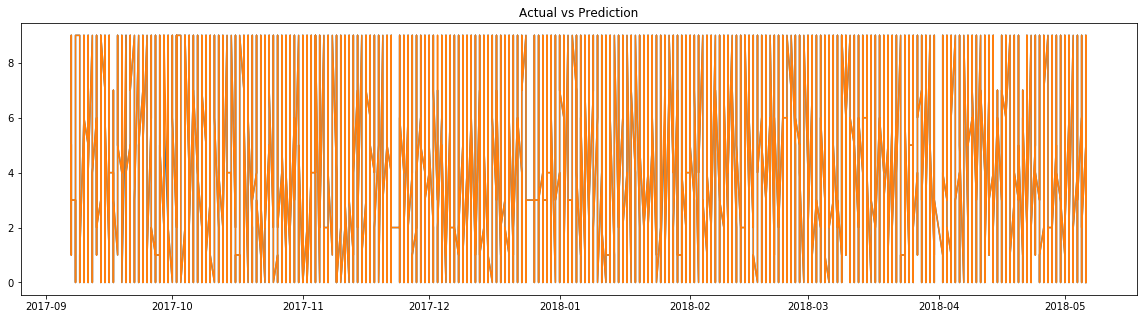

In [27]:
data=pd.read_csv("~/Desktop/combinedf.csv",parse_dates=['Date'])
plt.figure(figsize=(20,5))
plt.plot(data['Date'][-10003:].dt.date,y_pred)
plt.plot(data['Date'][-10003:].dt.date,y_test)
plt.title("Actual vs Prediction")